In [1]:
import sys
sys.path.append('../../')
from python_lib.halfedge_mesh import * #import a very lightweight package for half-edge data structures
import numpy as np
import open3d as o3d
from scipy.spatial import KDTree
import matplotlib.pyplot as plt
import os
# output folder
out_dir = "mesh_exports"
os.makedirs(out_dir, exist_ok=True)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# Part 1: Halfedge Mesh Data Structure

## Task 1:

In [78]:
def create_halfedge_cube():

    cube = HalfedgeMesh()  
    cube.update_vertices([
        [0, 0, 0],  # 0
        [1, 0, 0],  # 1
        [1, 1, 0],  # 2
        [0, 1, 0],  # 3
        [0, 0, 1],  # 4
        [1, 0, 1],  # 5
        [1, 1, 1],  # 6
        [0, 1, 1],  # 7
    ])

    cube.facets = [Facet(index=i) for i in range(6)]              
    cube.halfedges = [Halfedge(index=i) for i in range(24)]       

    ################## 2. Define Halfedge Connectivity ################
    
    # Face 0
    cube.halfedges[0].update(vertex=cube.vertices[4], next=cube.halfedges[1], facet=cube.facets[0], opposite=cube.halfedges[22])  # 4 to 5
    cube.halfedges[1].update(vertex=cube.vertices[5], next=cube.halfedges[2], facet=cube.facets[0], opposite=cube.halfedges[10])  # 5 to 6
    cube.halfedges[2].update(vertex=cube.vertices[6], next=cube.halfedges[3], facet=cube.facets[0], opposite=cube.halfedges[17])  # 6 to 7
    cube.halfedges[3].update(vertex=cube.vertices[7], next=cube.halfedges[0], facet=cube.facets[0], opposite=cube.halfedges[13])  # 7 to 4

    # Face 1 
    cube.halfedges[4].update(vertex=cube.vertices[0], next=cube.halfedges[5], facet=cube.facets[1], opposite=cube.halfedges[15])  # 0 to 3
    cube.halfedges[5].update(vertex=cube.vertices[3], next=cube.halfedges[6], facet=cube.facets[1], opposite=cube.halfedges[19])  # 3 to 2
    cube.halfedges[6].update(vertex=cube.vertices[2], next=cube.halfedges[7], facet=cube.facets[1], opposite=cube.halfedges[8])   # 2 to 1
    cube.halfedges[7].update(vertex=cube.vertices[1], next=cube.halfedges[4], facet=cube.facets[1], opposite=cube.halfedges[20])  # 1 to 0

    # Face 2 
    cube.halfedges[8].update(vertex=cube.vertices[1], next=cube.halfedges[9],  facet=cube.facets[2], opposite=cube.halfedges[6])   # 1 to 2
    cube.halfedges[9].update(vertex=cube.vertices[2], next=cube.halfedges[10], facet=cube.facets[2], opposite=cube.halfedges[18])  # 2 to 6
    cube.halfedges[10].update(vertex=cube.vertices[6], next=cube.halfedges[11], facet=cube.facets[2], opposite=cube.halfedges[1])  # 6 to 5
    cube.halfedges[11].update(vertex=cube.vertices[5], next=cube.halfedges[8],  facet=cube.facets[2], opposite=cube.halfedges[21]) # 5 to 1

    # Face 3 
    cube.halfedges[12].update(vertex=cube.vertices[0], next=cube.halfedges[13], facet=cube.facets[3], opposite=cube.halfedges[23]) # 0 to 4
    cube.halfedges[13].update(vertex=cube.vertices[4], next=cube.halfedges[14], facet=cube.facets[3], opposite=cube.halfedges[3])  # 4 to 7
    cube.halfedges[14].update(vertex=cube.vertices[7], next=cube.halfedges[15], facet=cube.facets[3], opposite=cube.halfedges[16]) # 7 to 3
    cube.halfedges[15].update(vertex=cube.vertices[3], next=cube.halfedges[12], facet=cube.facets[3], opposite=cube.halfedges[4])  # 3 to 0

    # Face 4 
    cube.halfedges[16].update(vertex=cube.vertices[3], next=cube.halfedges[17], facet=cube.facets[4], opposite=cube.halfedges[14]) # 3 to 7
    cube.halfedges[17].update(vertex=cube.vertices[7], next=cube.halfedges[18], facet=cube.facets[4], opposite=cube.halfedges[2])  # 7 to 6
    cube.halfedges[18].update(vertex=cube.vertices[6], next=cube.halfedges[19], facet=cube.facets[4], opposite=cube.halfedges[9])  # 6 to 2
    cube.halfedges[19].update(vertex=cube.vertices[2], next=cube.halfedges[16], facet=cube.facets[4], opposite=cube.halfedges[5])  # 2 to 3

    # Face 5
    cube.halfedges[20].update(vertex=cube.vertices[0], next=cube.halfedges[21], facet=cube.facets[5], opposite=cube.halfedges[7])  # 0 to 1
    cube.halfedges[21].update(vertex=cube.vertices[1], next=cube.halfedges[22], facet=cube.facets[5], opposite=cube.halfedges[11]) # 1 to 5
    cube.halfedges[22].update(vertex=cube.vertices[5], next=cube.halfedges[23], facet=cube.facets[5], opposite=cube.halfedges[0])  # 5 to 4
    cube.halfedges[23].update(vertex=cube.vertices[4], next=cube.halfedges[20], facet=cube.facets[5], opposite=cube.halfedges[12]) # 4 to 0

    ########## 3. Define Facet Connectivity ##############

    cube.facets[0].update(halfedge=cube.halfedges[0])
    cube.facets[1].update(halfedge=cube.halfedges[4])
    cube.facets[2].update(halfedge=cube.halfedges[8])
    cube.facets[3].update(halfedge=cube.halfedges[12])
    cube.facets[4].update(halfedge=cube.halfedges[16])
    cube.facets[5].update(halfedge=cube.halfedges[20])

    ########## 4. Define Vertex Connectivity ##############

    # Assign one outgoing halfedge to every vertex
    cube.vertices[0].update(halfedge=cube.halfedges[20])  # 0 to 1
    cube.vertices[1].update(halfedge=cube.halfedges[8])   # 1 to 2
    cube.vertices[2].update(halfedge=cube.halfedges[9])   # 2 to 6
    cube.vertices[3].update(halfedge=cube.halfedges[5])   # 3 to 2
    cube.vertices[4].update(halfedge=cube.halfedges[0])   # 4 to 5
    cube.vertices[5].update(halfedge=cube.halfedges[1])   # 5 to 6
    cube.vertices[6].update(halfedge=cube.halfedges[2])   # 6 to 7
    cube.vertices[7].update(halfedge=cube.halfedges[3])   # 7 to 4

    return cube

In [10]:
cube = create_halfedge_cube()
cube.write_off('cube.off') 

## Task 2:

In [77]:
def facet_center(facet):
    # facet.get_vertices tarts from h0 = facet.halfedge, takes that halfedge’s vertex, and puts it into a list. 
    # then it repeatedly follows h = h.next around the face.
    # at each step, if the traversal has returned to the starting halfedge (h == h0), it stops. 
    # otherwise, it appends h.vertex and continues, so the returned list is the vertices encountered in the face loop order, 
    # with the start vertex included once and never repeated at the end.
    vertices = facet.get_vertices()
    coords = np.array([[v.x, v.y, v.z] for v in vertices])
    return tuple(coords.mean(axis=0))

In [12]:
facet = cube.facets[0] 
center = facet_center(facet)
print(center)

(0.5, 0.5, 1.0)


## Task 3:

In [75]:
def dual_polyhedron(mesh):

    def get_neighbors(vertex):
        origin_halfedge = vertex.halfedge
        neighbor_vertices = []
        halfedge_list = []
        
        current_halfedge = origin_halfedge

        while True:
            halfedge_list.append(current_halfedge)
            neighbor_vertices.append(current_halfedge.opposite.vertex)
            current_halfedge = current_halfedge.opposite.next
            if current_halfedge == origin_halfedge:
                break
        
        return neighbor_vertices, halfedge_list
    
    dual = HalfedgeMesh()
    
    face_centers = [facet_center(facet) for facet in mesh.facets]
    dual.update_vertices(face_centers)
    
    dual.facets = [Facet(index = i) for i in range(len(mesh.vertices))]
    dual.halfedges = [Halfedge(index = i) for i in range(len(mesh.halfedges))]
    
    for vertex in mesh.vertices:
        neighbor_vertices, halfedge_list = get_neighbors(vertex)
        dual.facets[vertex.index].update(halfedge = dual.halfedges[vertex.halfedge.index])
        
        for neighbor, near_halfedges in zip(neighbor_vertices, halfedge_list):
            dual.halfedges[near_halfedges.index].update(
                vertex = dual.vertices[near_halfedges.facet.index],
                next = dual.halfedges[near_halfedges.opposite.next.index],
                facet = dual.facets[vertex.index],
                opposite = dual.halfedges[near_halfedges.opposite.index]
            )
            
            current_half = dual.halfedges[near_halfedges.index]
            dual.facets[neighbor.index].update(halfedge = current_half.opposite)
            dual.vertices[current_half.vertex.index].update(halfedge = current_half)
    
    # mirror x-coordinates to maintain consistent orientation
    for vertex in dual.vertices:
        vertex.x = -1 * vertex.x
    
    return dual

In [14]:
dual_cube = dual_polyhedron(cube)
double_dual_cube = dual_polyhedron(dual_cube)

dual_cube.write_obj("cube_dual.obj")
double_dual_cube.write_obj("cube_double_dual.obj")

In [73]:
sphere = HalfedgeMesh('halfedge-mesh-test-meshes/sphere1.off')
flower = HalfedgeMesh('halfedge-mesh-test-meshes/flower.off')
head   = HalfedgeMesh('halfedge-mesh-test-meshes/igea11706.off')

In [5]:
dual_sphere = dual_polyhedron(sphere)
dual_flower = dual_polyhedron(flower)
dual_head   = dual_polyhedron(head)

dual_sphere.write_obj("sphere_dual.obj")
dual_flower.write_obj("flower_dual.obj")
dual_head.write_obj("head_dual.obj")

In [6]:
double_dual_sphere = dual_polyhedron(dual_sphere)
double_dual_flower = dual_polyhedron(dual_flower)
double_dual_head   = dual_polyhedron(dual_head)

double_dual_sphere.write_obj("sphere_double_dual.obj")
double_dual_flower.write_obj("flower_double_dual.obj")
double_dual_head.write_obj("head_double_dual.obj")

## Task 4:

In [79]:
def mesh_volume(mesh):

    # use the first mesh vertex as a reference point
    reference_point = np.array(mesh.vertices[0].get_vertex(), dtype=float)

    total_signed_volume = 0.0

    for facet in mesh.facets:

        facet_vertices = facet.get_vertices()

        # skip invalid facets
        if len(facet_vertices) < 3:
            continue

        # convert facet vertices to numpy arrays
        vertex_positions = [np.array(vertex.get_vertex(), dtype=float) for vertex in facet_vertices]

        last_vertex = len(vertex_positions) - 1

        # signed‑volume formula for tetrahedron = (1/6) * (v1-v0) . ((v2-v0) x (v3-v0))
        for i in range(1, last_vertex):

            a = vertex_positions[0] - reference_point
            b = vertex_positions[i] - reference_point
            c = vertex_positions[i + 1] - reference_point

            tetra_signed_volume = np.dot(a, np.cross(b, c)) / 6.0
            total_signed_volume += tetra_signed_volume

    return abs(total_signed_volume)

results = []

current_mesh = flower
initial_volume = mesh_volume(current_mesh)
results.append((0, initial_volume))

print(f"Initial volume: {initial_volume:.6f}\n")

for i in range(10):
    print(f"Starting double dual iteration {i + 1}/10...")
    
    print(f"  Computing first dual...")
    dual_1 = dual_polyhedron(current_mesh)
    print(f"  First dual complete.")
    
    print(f"  Computing second dual...")
    dual_2 = dual_polyhedron(dual_1)
    print(f"  Second dual complete.")
    
    current_mesh = dual_2
    print(f"  Computing volume...")
    volume = mesh_volume(current_mesh)
    results.append((i + 1, volume))
    print(f"  Iteration {i + 1} volume: {volume:.6f}")
    print()

# final results in a table
print("Iteration | Volume")
for iteration, volume in results:
    print(f"{iteration:^20} | {volume:.6f}")

Initial volume: 1.104330

Starting double dual iteration 1/10...
  Computing first dual...
  First dual complete.
  Computing second dual...
  Second dual complete.
  Computing volume...
  Iteration 1 volume: 1.101410

Starting double dual iteration 2/10...
  Computing first dual...
  First dual complete.
  Computing second dual...
  Second dual complete.
  Computing volume...
  Iteration 2 volume: 1.098539

Starting double dual iteration 3/10...
  Computing first dual...
  First dual complete.
  Computing second dual...
  Second dual complete.
  Computing volume...
  Iteration 3 volume: 1.095714

Starting double dual iteration 4/10...
  Computing first dual...
  First dual complete.
  Computing second dual...
  Second dual complete.
  Computing volume...
  Iteration 4 volume: 1.092937

Starting double dual iteration 5/10...
  Computing first dual...
  First dual complete.
  Computing second dual...
  Second dual complete.
  Computing volume...
  Iteration 5 volume: 1.090205

Starting 

# Part 2: ICP Algorithm

## Task 1:

In [ ]:
def best_fit_transform(source, target):

    source_centroid = source.mean(axis=0)
    target_centroid = target.mean(axis=0)
    source_centered = source - source_centroid
    target_centered = target - target_centroid

    # cross-covariance matrix 
    H = source_centered.T @ target_centered

    # SVD
    U, S, Vt = np.linalg.svd(H)

    # find rotation 
    det = np.linalg.det(Vt.T @ U.T)
    D = np.diag([1.0, 1.0, det])  # diagonal correction matrix
    Rotation = Vt.T @ D @ U.T

    # translation
    t = target_centroid - Rotation @ source_centroid

    # build homogeneous transform
    T = np.eye(4)
    T[:3, :3] = Rotation    
    T[:3,  3] = t

    return Rotation, t, T

def apply_transform(pts, T):

    pts = np.asarray(pts, dtype=np.float64)
    R = T[:3, :3] 
    t = T[:3, 3]  

    return (R @ pts.T).T + t
    
def find_nonoverlap(source, target, overlap_threshold=None):

    # build KD-trees for nearest neighbor queries
    target_tree = KDTree(target)
    source_tree = KDTree(source)

    # find nearest neighbor distances for each point
    dist_source_to_target, _ = target_tree.query(source, k=1) 
    dist_target_to_source, _ = source_tree.query(target, k=1)

    # compute threshold based on median distance
    if overlap_threshold is None:
        all_distances = np.concatenate([dist_source_to_target, dist_target_to_source])
        overlap_threshold = 2.0 * np.median(all_distances)

    # non overlap = distance greater than threshold
    src_non = dist_source_to_target > overlap_threshold
    tgt_non = dist_target_to_source > overlap_threshold

    return src_non, tgt_non, overlap_threshold


def icp(source, target, max_iterations=100, tolerance=1e-7, distance_threshold=None):

    # initialize T_total 
    T_total = np.eye(4)
    rmse_history = []
    # previous RMSE for convergence check
    prev_rmse = np.inf
    tree = KDTree(target)

    for iter in range(max_iterations):

        # find nearest neighbors and distances 
        dist, idx = tree.query(source, k=1, workers=-1)
        # create mask for pairs within distance threshold if set, otherwise consider all pairs
        mask = dist < distance_threshold if distance_threshold is not None else np.ones(len(dist), dtype=bool)
        if mask.sum() < 3:
            break

        # compute best fit transform for inlier pairs and apply to source
        R, t, T = best_fit_transform(source[mask], target[idx[mask]])
        source = apply_transform(source, T)
        T_total = T @ T_total
        rmse = np.sqrt(np.mean(dist[mask]**2))
        rmse_history.append(rmse)

        # check for convergence
        if abs(prev_rmse - rmse) < tolerance:
            break
        prev_rmse = rmse
        
    return source, T_total, rmse_history

In [ ]:
M1 = o3d.io.read_triangle_mesh("bunnies/bun000_v2.ply")
M2 = o3d.io.read_triangle_mesh("bunnies/bun045_v2.ply")

# align to origin 
centroid = np.asarray(M1.vertices).mean(axis=0)
M1.translate(-centroid)
M2.translate(-centroid)

# convert points to numpy arrays 
target_points = np.asarray(M1.vertices, dtype=np.float64)
source_points = np.asarray(M2.vertices, dtype=np.float64)

# compute bounding box and set distance threshold for wrong correspondences 
bounding_box = np.linalg.norm(source_points.max(0) - source_points.min(0))
distance_threshold = bounding_box * 0.05

print(f'M1 {target_points.shape}, M2 {source_points.shape}')
print(f'bounding box diagonal: {bounding_box:.5f}, dist threshold: {distance_threshold:.5f}')

M1 (40256, 3), M2 (40097, 3)
bounding box diagonal: 0.25389, dist threshold: 0.01269


In [4]:
source_p2p, T_p2p, hist_p2p = icp(
    source=source_points,
    target=target_points,
    distance_threshold=distance_threshold
)

# mesh copy
M2_aligned = o3d.geometry.TriangleMesh(M2) 
M2_aligned.vertices = o3d.utility.Vector3dVector(source_p2p)
M2_aligned.compute_vertex_normals()

src_non_overlap, tgt_non_overlap, ov_thresh = find_nonoverlap(source_p2p, target_points)

# M1 is the target, M2_aligned is the aligned source
# red = non-overlapping
# green = overlapping region
M1_colored = o3d.geometry.TriangleMesh(M1)
colors_target = np.where(
    tgt_non_overlap[:, None],
    [1.0, 0.0, 0.0],       
    [0.0, 1.0, 0.0]        
)
M1_colored.vertex_colors = o3d.utility.Vector3dVector(colors_target)

M2_colored = o3d.geometry.TriangleMesh(M2_aligned)
colors_source = np.where(
    src_non_overlap[:, None],
    [1.0, 0.0, 0.0],     
    [0.0, 1.0, 0.0]      
)
M2_colored.vertex_colors = o3d.utility.Vector3dVector(colors_source)

# save outputs
o3d.io.write_triangle_mesh(os.path.join(out_dir, "target_coloured.ply"), M1_colored)
o3d.io.write_triangle_mesh(os.path.join(out_dir, "aligned_source_coloured.ply"), M2_colored)

True

## Weighted point-set alignment derivation

We want to minimize the weighted alignment error
$$
E(\mathbf{R},\mathbf{t})
=\sum_{i=1}^N w_i \,\bigl\lVert \mathbf{R}\mathbf{p}_i+\mathbf{t}-\mathbf{q}_i\bigr\rVert^2,
\qquad w_i\in[0,1],
$$
over a rotation $\mathbf{R}\in SO(d)$ and translation $\mathbf{t}\in\mathbb{R}^d$.
Assume $\sum_i w_i>0$.

### Optimal translation for a fixed rotation

Differentiate w.r.t. $\mathbf{t}$:
$$
\frac{\partial E}{\partial \mathbf{t}}
=2\sum_{i=1}^N w_i\left(\mathbf{R}\mathbf{p}_i+\mathbf{t}-\mathbf{q}_i\right)=\mathbf{0}.
$$
Let $W\coloneqq \sum_i w_i$ and define the weighted centroids
$$
\bar{\mathbf{p}} \coloneqq \frac{1}{W}\sum_{i=1}^N w_i\mathbf{p}_i,
\qquad
\bar{\mathbf{q}} \coloneqq \frac{1}{W}\sum_{i=1}^N w_i\mathbf{q}_i.
$$
Solving for $\mathbf{t}$ yields
$$
\boxed{\;\mathbf{t}^\star(\mathbf{R})=\bar{\mathbf{q}}-\mathbf{R}\bar{\mathbf{p}}.\;}
$$

### Reduce to a centered (rotation-only) problem

Define centered points
$$
\mathbf{p}'_i\coloneqq \mathbf{p}_i-\bar{\mathbf{p}},\qquad
\mathbf{q}'_i\coloneqq \mathbf{q}_i-\bar{\mathbf{q}}.
$$
Substitute $\mathbf{t}^\star$ into the residual:
$$
\mathbf{R}\mathbf{p}_i+\mathbf{t}^\star-\mathbf{q}_i
=\mathbf{R}\mathbf{p}_i+\bar{\mathbf{q}}-\mathbf{R}\bar{\mathbf{p}}-\mathbf{q}_i
=\mathbf{R}\mathbf{p}'_i-\mathbf{q}'_i.
$$
Hence the objective becomes
$$
E(\mathbf{R},\mathbf{t}^\star(\mathbf{R}))
=\sum_{i=1}^N w_i \,\lVert \mathbf{R}\mathbf{p}'_i-\mathbf{q}'_i\rVert^2.
$$
Expand using $\lVert \mathbf{a}-\mathbf{b}\rVert^2=\lVert\mathbf{a}\rVert^2+\lVert\mathbf{b}\rVert^2-2\mathbf{a}^\top\mathbf{b}$ and $\mathbf{R}^\top\mathbf{R}=\mathbf{I}$:
$$
E(\mathbf{R},\mathbf{t}^\star)
=\sum_i w_i\left(\lVert \mathbf{p}'_i\rVert^2+\lVert \mathbf{q}'_i\rVert^2\right)
-2\sum_i w_i\,(\mathbf{R}\mathbf{p}'_i)^\top \mathbf{q}'_i.
$$
The first term is constant w.r.t. $\mathbf{R}$, so minimizing $E$ is equivalent to maximizing
$$
\sum_i w_i\,(\mathbf{R}\mathbf{p}'_i)^\top \mathbf{q}'_i
=\sum_i w_i\,\mathrm{tr}\!\left(\mathbf{R}\mathbf{p}'_i(\mathbf{q}'_i)^\top\right)
=\mathrm{tr}\!\left(\mathbf{R}\,\mathbf{H}\right),
$$
where the weighted cross-covariance matrix is
$$
\boxed{\;\mathbf{H}\coloneqq \sum_{i=1}^N w_i\,\mathbf{p}'_i(\mathbf{q}'_i)^\top.\;}
$$

### Optimal rotation via SVD

Take an SVD $\mathbf{H}=\mathbf{U}\mathbf{\Sigma}\mathbf{V}^\top$ with $\mathbf{U},\mathbf{V}\in O(d)$ and $\mathbf{\Sigma}\succeq 0$ diagonal.
Then
$$
\mathrm{tr}(\mathbf{R}\mathbf{H})
=\mathrm{tr}\!\left(\mathbf{R}\mathbf{U}\mathbf{\Sigma}\mathbf{V}^\top\right)
=\mathrm{tr}\!\left(\mathbf{V}^\top\mathbf{R}\mathbf{U}\,\mathbf{\Sigma}\right).
$$
Let $\mathbf{M}\coloneqq \mathbf{V}^\top\mathbf{R}\mathbf{U}\in O(d)$.
Since $\mathbf{\Sigma}$ is diagonal with nonnegative entries, the trace is maximized by making $\mathbf{M}$ as close to $\mathbf{I}$ as possible, while enforcing $\det(\mathbf{R})=+1$.
This gives
$$
\boxed{\;
\mathbf{R}^\star
=\mathbf{V}\mathbf{D}\mathbf{U}^\top,
\qquad
\mathbf{D}\coloneqq \mathrm{diag}\!\bigl(1,\dots,1,\det(\mathbf{V}\mathbf{U}^\top)\bigr).
\;}
$$
(If reflections are allowed, i.e. $\mathbf{R}\in O(d)$, then $\mathbf{D}=\mathbf{I}$.)

### Final solution

Compute the weighted centroids $\bar{\mathbf{p}},\bar{\mathbf{q}}$, build $\mathbf{H}=\sum_i w_i \mathbf{p}'_i(\mathbf{q}'_i)^\top$, take its SVD, then
$$
\boxed{\;\mathbf{R}^\star=\mathbf{V}\mathbf{D}\mathbf{U}^\top,\qquad
\mathbf{t}^\star=\bar{\mathbf{q}}-\mathbf{R}^\star\bar{\mathbf{p}}.\;}
$$


## Task 2:

In [3]:
def R(angle):
    
    # compute radians, cosine and sine for the given angle
    rad = np.deg2rad(angle)
    c, s = np.cos(rad), np.sin(rad) 

    T = np.eye(4)
    # fill the upper-left 3x3 block of T with the rotation matrix for a rotation around the Z-axis
    T[:3, :3] = np.array(
        [
            [c, -s, 0.0],
            [s,  c, 0.0],
            [0.0, 0.0, 1.0],
        ],
        dtype=float,
    )

    return T

def rotation_angle_error(R_est, R_true):
    
    # formula for rotation angle error = arccos((trace(R_delta) - 1) / 2), where R_delta = R_est @ R_true.T
    R_delta = R_est @ R_true.T
    cos_theta = (np.trace(R_delta) - 1.0) / 2.0
    cos_theta = np.clip(cos_theta, -1.0, 1.0)

    return float(np.rad2deg(np.arccos(cos_theta)))

In [47]:
M1 = o3d.io.read_triangle_mesh("bunnies/bun000_v2.ply")
M2 = o3d.io.read_triangle_mesh("bunnies/bun045_v2.ply")

# align to origin 
centroid = np.asarray(M1.vertices).mean(axis=0)
M1.translate(-centroid)
M2.translate(-centroid)

# convert points to numpy arrays 
target_points = np.asarray(M1.vertices, dtype=np.float64)
source_points = np.asarray(M2.vertices, dtype=np.float64)

# mesh copys for saving
M1_centered = o3d.io.read_triangle_mesh("bunnies/bun000_v2.ply")
M1_centered.translate(-centroid)
M2_centered = o3d.io.read_triangle_mesh("bunnies/bun045_v2.ply")
M2_centered.translate(-centroid)

TriangleMesh with 40097 points and 79057 triangles.

In [7]:
# export M1 = blue
M1_col = o3d.geometry.TriangleMesh(M1_centered)
M1_col.paint_uniform_color([0, 0, 1])
o3d.io.write_triangle_mesh(os.path.join(out_dir, f"M1.ply"), M1_col)

angles_pos = np.arange(5, 185, 5)
all_angles = np.concatenate([-angles_pos[::-1], angles_pos])

results = []

for angle in all_angles:

    # M2 = R(M1)
    T_true = R(angle)
    M2 = apply_transform(target_points, T_true)

    M2_aligned, T_est, rmse_hist = icp(source=M2, target=target_points)

    # rotation error between estimated and true rotation
    R_inv_true = T_true[:3, :3].T
    R_est = T_est[:3, :3]
    rot_err = rotation_angle_error(R_est, R_inv_true)
    # final RMSE after ICP convergence
    final_rmse = rmse_hist[-1] if rmse_hist else np.nan
    # append results 
    results.append((angle, final_rmse, len(rmse_hist), rot_err, rmse_hist, M2_aligned))
    
    print(
        f"angle = {angle:+4.0f}° | iterations = {len(rmse_hist):2d} | "
        f"RMSE = {final_rmse:.3e} | rotation_error = {rot_err:6.2f}°"
    )

angle = -180° | iterations = 43 | RMSE = 1.060e-02 | rotation_error = 168.65°
angle = -175° | iterations = 63 | RMSE = 1.061e-02 | rotation_error = 167.66°
angle = -170° | iterations = 100 | RMSE = 1.062e-02 | rotation_error = 165.45°
angle = -165° | iterations = 31 | RMSE = 1.081e-02 | rotation_error = 143.16°
angle = -160° | iterations = 27 | RMSE = 1.081e-02 | rotation_error = 142.87°
angle = -155° | iterations = 28 | RMSE = 1.081e-02 | rotation_error = 142.55°
angle = -150° | iterations = 35 | RMSE = 1.081e-02 | rotation_error = 142.30°
angle = -145° | iterations = 44 | RMSE = 1.081e-02 | rotation_error = 142.28°
angle = -140° | iterations = 49 | RMSE = 1.081e-02 | rotation_error = 142.28°
angle = -135° | iterations = 53 | RMSE = 1.081e-02 | rotation_error = 142.27°
angle = -130° | iterations = 59 | RMSE = 1.081e-02 | rotation_error = 142.29°
angle = -125° | iterations = 64 | RMSE = 1.081e-02 | rotation_error = 142.27°
angle = -120° | iterations = 72 | RMSE = 1.081e-02 | rotation_e

In [12]:
# export aligned and unaligned meshes for evaluation of icp
export_angles = {60, 65, -70, -75}

for angle, final_rmse, n_iters, rot_err, rmse_hist, M2_aligned in results:
    if int(round(angle)) not in export_angles:
        continue

    # M2 with ICP = red
    M2_icp = o3d.geometry.TriangleMesh(M1_centered)
    M2_icp.vertices = o3d.utility.Vector3dVector(M2_aligned)
    M2_icp.paint_uniform_color([1, 0, 0])

    # M2 unaligned = green
    M2_initial = o3d.geometry.TriangleMesh(M1_centered)
    # apply the same rotation to M2_initial for visualization
    T_true = R(angle)
    M2_initial.transform(T_true)
    M2_initial.paint_uniform_color([0, 1, 0])

    tag = f"{angle:+04.0f}"
    o3d.io.write_triangle_mesh(os.path.join(out_dir, f"M2_aligned_red_{tag}.ply"), M2_icp)
    o3d.io.write_triangle_mesh(os.path.join(out_dir, f"M2_initial_green_{tag}.ply"), M2_initial)

In [17]:
# unpack results for plotting
angles = np.array([r[0] for r in results])
rmses = np.array([r[1] for r in results])
n_iters = np.array([r[2] for r in results])
rotation_errors = np.array([r[3] for r in results])
converged = rotation_errors < 2.0
max_iter = max(n_iters)

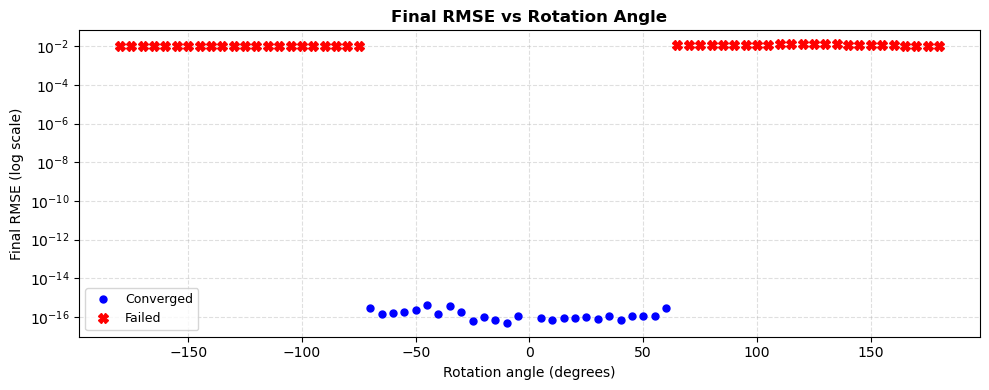

In [42]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.semilogy(angles[converged],  rmses[converged],  'o', color='blue', markersize=5, label='Converged')
ax.semilogy(angles[~converged], rmses[~converged], 'X', color='red',  markersize=7, label='Failed')
ax.set_title('Final RMSE vs Rotation Angle', fontweight='bold')
ax.set_xlabel('Rotation angle (degrees)')
ax.set_ylabel('Final RMSE (log scale)')
ax.legend(fontsize=9)
ax.grid(True, which='both', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

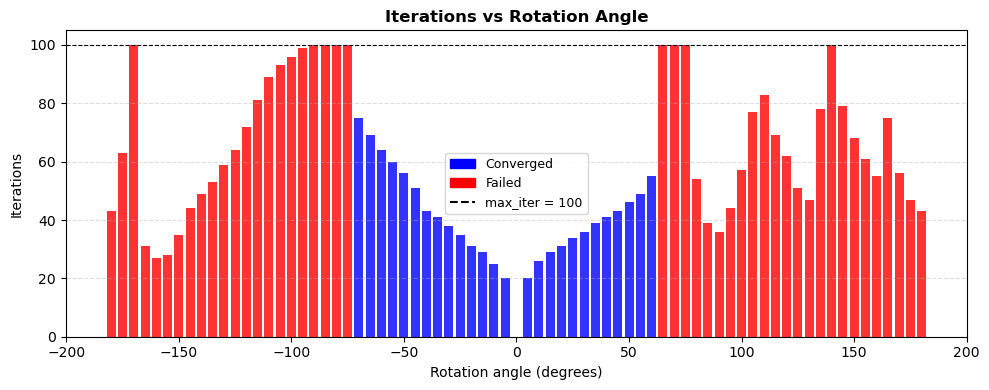

In [43]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.bar(angles, n_iters, width=4, color=['blue' if c else 'red' for c in converged], alpha=0.8)
ax.axhline(max_iter, color='black', linestyle='--', linewidth=0.8, label=f'max_iter = {max_iter}')
ax.set_title('Iterations vs Rotation Angle', fontweight='bold')
ax.set_xlabel('Rotation angle (degrees)')
ax.set_ylabel('Iterations')
ax.legend(handles=[
    plt.Rectangle((0, 0), 1, 1, color='blue', label='Converged'),
    plt.Rectangle((0, 0), 1, 1, color='red',  label='Failed'),
    plt.Line2D([0], [0], color='black', linestyle='--', label=f'max_iter = {max_iter}')
], fontsize=9)
ax.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

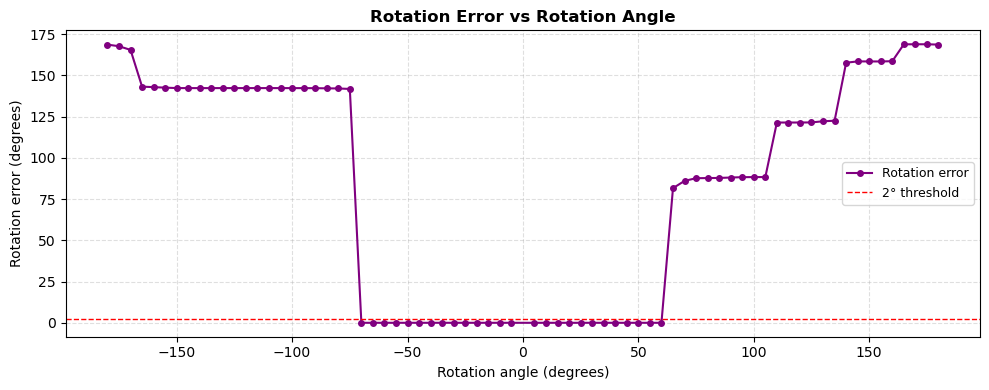

In [44]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(angles, rotation_errors, 'o-', color='purple', markersize=4, linewidth=1.5, label='Rotation error')
ax.axhline(2.0, color='red', linestyle='--', linewidth=1, label='2° threshold')
ax.set_title('Rotation Error vs Rotation Angle', fontweight='bold')
ax.set_xlabel('Rotation angle (degrees)')
ax.set_ylabel('Rotation error (degrees)')
ax.legend(fontsize=9)
ax.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [ ]:
# copy of M2 vertices
P2_base = source_points.copy()

# compute bounding box diagonal for noise scaling
bounding_box = np.linalg.norm(P2_base.max(0) - P2_base.min(0))

noise_levels = [0.0, 0.001, 0.0025, 0.005, 0.01, 0.02, 0.05, 0.10, 0.20, 0.30]
noise_exports = {0.001, 0.005, 0.02, 0.10}

noise_results = []
rng = np.random.default_rng(7)

for level in noise_levels:

    sigma = level * bounding_box
    noise = rng.normal(loc=0.0, scale=sigma, size=P2_base.shape)
    P2_noisy = P2_base + noise

    P2_aligned, T_est, rmse_hist = icp(source=P2_noisy, target=target_points)

    R_est = T_est[:3, :3]
    rot_err = rotation_angle_error(R_est, np.eye(3))
    final_rmse = rmse_hist[-1] if rmse_hist else float("nan")

    noise_results.append((level, sigma, len(rmse_hist), final_rmse, rot_err))

    print(
        f"noise = {level:.4f} | sigma = {sigma:.5f} | "
        f"iterations = {len(rmse_hist):2d} | RMSE = {final_rmse:.6f} | "
        f"rotation_error = {rot_err:.4f}°"
    )

    if level in noise_exports:

        # M2 aligned (noisy input after ICP) = red
        M2_aligned_pcd = o3d.geometry.PointCloud()
        M2_aligned_pcd.points = o3d.utility.Vector3dVector(P2_aligned)
        M2_aligned_pcd.paint_uniform_color([1, 0, 0])

        tag = f"noise_{level:.4f}"
        o3d.io.write_point_cloud(os.path.join(out_dir, f"M2_aligned_{tag}.ply"), M2_aligned_pcd)

noise = 0.0000 | sigma = 0.00000 | iterations = 34 | RMSE = 0.002022 | rotation_error = 32.4521°
noise = 0.0010 | sigma = 0.00025 | iterations = 34 | RMSE = 0.002037 | rotation_error = 32.4404°
noise = 0.0025 | sigma = 0.00063 | iterations = 35 | RMSE = 0.002120 | rotation_error = 32.4303°
noise = 0.0050 | sigma = 0.00127 | iterations = 35 | RMSE = 0.002405 | rotation_error = 32.4070°
noise = 0.0100 | sigma = 0.00254 | iterations = 33 | RMSE = 0.003268 | rotation_error = 32.2286°
noise = 0.0200 | sigma = 0.00508 | iterations = 28 | RMSE = 0.005414 | rotation_error = 31.6118°
noise = 0.0500 | sigma = 0.01269 | iterations = 35 | RMSE = 0.012475 | rotation_error = 27.2912°
noise = 0.1000 | sigma = 0.02539 | iterations = 27 | RMSE = 0.024579 | rotation_error = 22.6910°
noise = 0.2000 | sigma = 0.05078 | iterations = 30 | RMSE = 0.053632 | rotation_error = 20.6259°
noise = 0.3000 | sigma = 0.07617 | iterations = 53 | RMSE = 0.088768 | rotation_error = 17.0634°


In [ ]:
# unpack results for plotting
levels = np.array([r[0] for r in noise_results])
rmses = np.array([r[3] for r in noise_results])
rot_errs = np.array([r[4] for r in noise_results])

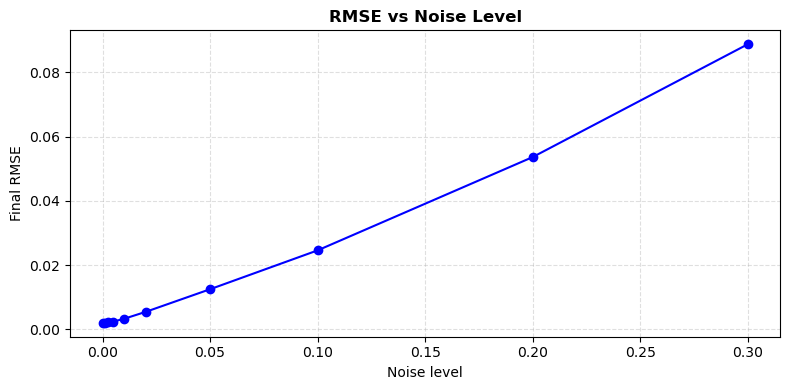

In [71]:
# RMSE vs noise level plot
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(levels, rmses, 'o-', color='blue', markersize=6, linewidth=1.5)
ax.set_xlabel('Noise level')
ax.set_ylabel('Final RMSE')
ax.set_title('RMSE vs Noise Level', fontweight='bold')
ax.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

## Task 3:

In [ ]:
M1 = o3d.io.read_triangle_mesh('bunnies/bun000_v2.ply')
M2 = o3d.io.read_triangle_mesh('bunnies/bun045_v2.ply')

# vertex normals 
M1.compute_vertex_normals()
M2.compute_vertex_normals()

# center at the origin
target_vertices_raw = np.asarray(M1.vertices)
centroid = target_vertices_raw.mean(axis=0)
M1.translate(-centroid)
M2.translate(-centroid)

# convert to numpy arrays
target_points = np.asarray(M1.vertices)
target_normals = np.asarray(M1.vertex_normals)
source_points = np.asarray(M2.vertices)
source_normals = np.asarray(M2.vertex_normals)

# bounding box and distance threshold for wrong correspondences 
bounding_box = np.linalg.norm(source_points.max(0) - source_points.min(0))
dist_thresh = bounding_box * 0.05

print(f'M1 {target_points.shape}  M2 {source_points.shape}')
print(f'bbox diagonal: {bounding_box:.5f}   dist threshold: {dist_thresh:.5f}')

M1 (40256, 3)  M2 (40097, 3)
bbox diagonal: 0.25389   dist threshold: 0.01269


In [ ]:
def compute_transform(source, target, normals):

    A = np.hstack([np.cross(source, normals), normals])
    b = np.einsum("ij,ij->i", (target - source), normals)

    AtA = A.T @ A
    Atb = A.T @ b
    solution = np.linalg.solve(AtA, Atb)

    rotation_vec = solution[:3]
    t = solution[3:]

    K = np.array([
        [ 0.0, -rotation_vec[2],  rotation_vec[1]],
        [ rotation_vec[2], 0.0, -rotation_vec[0]],
        [-rotation_vec[1], rotation_vec[0], 0.0],
    ])
    R_raw = np.eye(3) + K
    U, S, Vt = np.linalg.svd(R_raw)
    R = U @ Vt
    if np.linalg.det(R) < 0:
        U[:, -1] *= -1
        R = U @ Vt

    T = np.eye(4)
    T[:3, :3] = R
    T[:3, 3]  = t

    return T

def apply_transform(pts, T):

    pts = np.asarray(pts, dtype=np.float64)
    R = T[:3, :3] 
    t = T[:3, 3]  

    return (R @ pts.T).T + t

def icp_point_to_plane(
    source_points,
    source_normals,
    target_points,
    target_normals,
    max_iter=60,
    tol=1e-7,
    dist_thresh=None,
):
    src = source_points.copy()
    src_normals  = source_normals.copy()

    T_total = np.eye(4)
    history = []
    prev_rmse = np.inf

    tree = KDTree(target_points)

    for it in range(max_iter):

        distances, indices = tree.query(src, k=1, workers=-1)

        mask = distances < dist_thresh if dist_thresh is not None else np.ones(len(distances), dtype=bool)

        if mask.sum() < 6:
            print(f"Too few correspondences ({mask.sum()}), stopping.")
            break

        src_matched = src[mask]
        target_matched = target_points[indices[mask]]
        target_normals_matched = target_normals[indices[mask]]

        T_inc = compute_transform(src_matched, target_matched, target_normals_matched)

        src = apply_transform(src, T_inc)
        src_normals = (T_inc[:3, :3] @ src_normals.T).T
        T_total = T_inc @ T_total

        src_matched_updated = src[mask]
        residuals = np.einsum("ij,ij->i", (target_matched - src_matched_updated), target_normals_matched)
        rmse = float(np.sqrt(np.mean(residuals ** 2)))
        history.append(rmse)

        if abs(prev_rmse - rmse) < tol:
            print(f"  Converged at iter {it+1} (RMSE={rmse:.6f})")
            break
        
        prev_rmse = rmse

    return src, src_normals, T_total, history

In [112]:
source_p2pl, nrm_p2pl, T_p2pl, hist_p2pl = icp_point_to_plane(
    source_points=source_points,
    source_normals=source_normals,
    target_points=target_points,
    target_normals=target_normals,
    dist_thresh=dist_thresh,
)

print(f"point-to-plane ICP: iters={len(hist_p2pl)} final_plane_rmse={hist_p2pl[-1] if hist_p2pl else np.nan:.6f}")

# visual check
M1_col = o3d.geometry.TriangleMesh(M1)
M1_col.paint_uniform_color([0, 0, 1])

M2_col = o3d.geometry.TriangleMesh(M2)
M2_col.vertices = o3d.utility.Vector3dVector(source_p2pl)
M2_col.paint_uniform_color([1, 0, 0])

o3d.io.write_triangle_mesh(os.path.join(out_dir, "ptpl_icp_target.ply"), M1_col)
o3d.io.write_triangle_mesh(os.path.join(out_dir, "ptpl_icp_aligned.ply"), M2_col)

  Converged at iter 12 (RMSE=0.000544)
point-to-plane ICP: iters=12 final_plane_rmse=0.000544


True

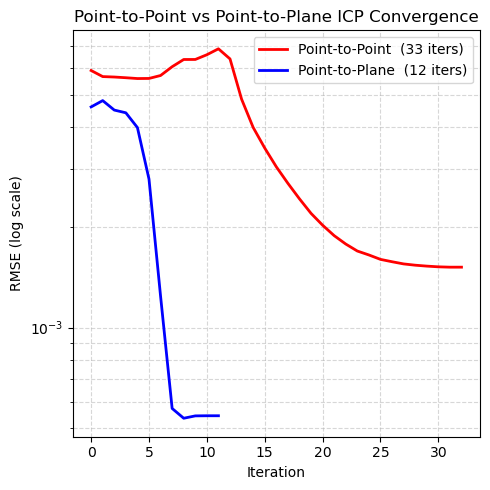

In [110]:
# Convergence plot 
fig, ax = plt.subplots(figsize=(5, 5))
ax.semilogy(hist_p2p, color='red', lw=2,label=f'Point-to-Point  ({len(hist_p2p)} iters)')
ax.semilogy(hist_p2pl, color='blue',   lw=2, label=f'Point-to-Plane  ({len(hist_p2pl)} iters)')
ax.set_xlabel('Iteration')
ax.set_ylabel('RMSE (log scale)')
ax.set_title('Point-to-Point vs Point-to-Plane ICP Convergence')
ax.legend(fontsize=10)  
ax.grid(True, which='both', ls='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
final_rmse_p2pl = hist_p2pl[-1]
final_rmse_p2pt = hist_p2p[-1]

print(f"Point-to-Plane final RMSE: {final_rmse_p2pl:.6f}")
print(f"Point-to-Point final RMSE: {final_rmse_p2pt:.6f}")

Point-to-Plane final RMSE: 0.000544
Point-to-Point final RMSE: 0.001518
